In [1]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")


In [2]:
#importing data from kaggle
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df = df.drop("Time", axis=1)

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [5]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [6]:
#standard scaling
df['std_Amount'] = scaler.fit_transform(df['Amount'].values.reshape (-1,1))

#removing Amount
df = df.drop("Amount", axis=1)

<Axes: xlabel='Class', ylabel='count'>

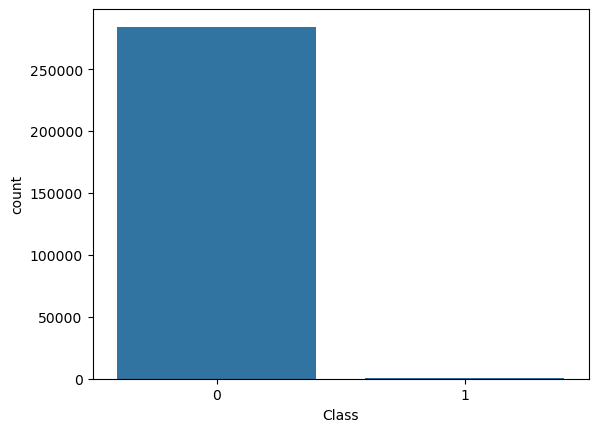

In [7]:
sns.countplot(x="Class", data=df)

In [8]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.14.0-py3-none-any.whl.metadata (8.8 kB)
Using cached imbalanced_learn-0.14.0-py3-none-any.whl (239 kB)


In [9]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler 

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [10]:
cols = df.columns.tolist()
cols = [c for c in cols if c not in ["Class"]]
target = "Class"

In [11]:
#define X and Y
X = df[cols]
Y = df[target]

#undersample
X_under, Y_under = undersample.fit_resample(X, Y)

In [12]:
from pandas import DataFrame
test = pd.DataFrame(Y_under, columns = ['Class'])

Text(0.5, 1.0, 'After')

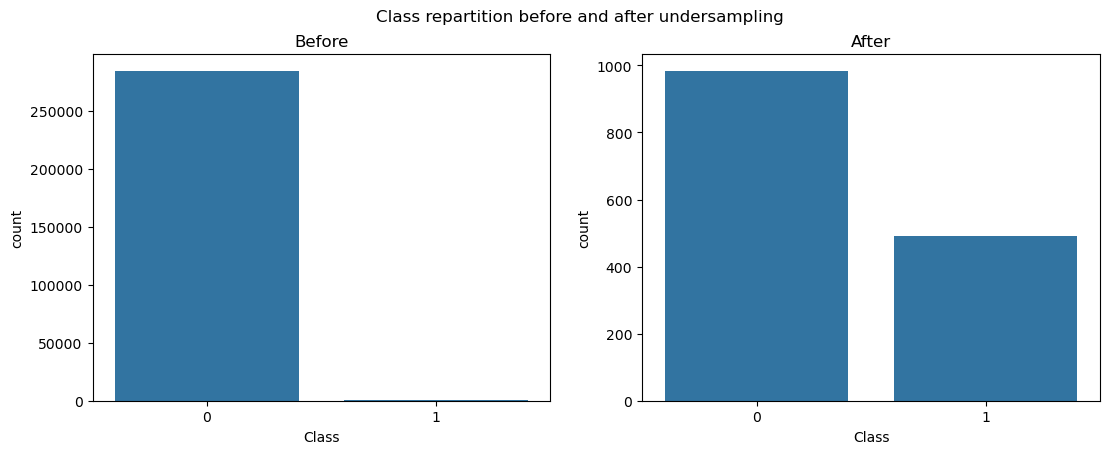

In [13]:
#visualizing undersampling results
fig, axs = plt.subplots(ncols=2, figsize=(13,4.5))
sns.countplot(x="Class", data=df, ax=axs[0])
sns.countplot(x="Class", data=test, ax=axs[1])

fig.suptitle("Class repartition before and after undersampling")
a1=fig.axes[0]
a1.set_title("Before")
a2=fig.axes[1]
a2.set_title("After")

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_under, Y_under, test_size=0.2, random_state=1)

In [15]:
#importing packages for modeling
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Load your data
df = pd.read_csv('creditcard.csv')

# Define your features (X) and target (y)
X = df.drop('Class', axis=1) # Assuming 'Class' is your target
y = df['Class']

In [17]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Now, this cell will work correctly
model1 = LogisticRegression(random_state=2)
logit = model1.fit(X_train, y_train)

print("Model trained successfully!")

Model trained successfully!


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Create a scaler object
scaler = StandardScaler()

# 2. Fit the scaler on the TRAINING data and transform it
#    Use fit_transform on the training data so the scaler learns the data's properties
X_train_scaled = scaler.fit_transform(X_train)

# 3. ONLY transform the TESTING data
#    Use just .transform on the test data to apply the same scaling learned from the training data
X_test_scaled = scaler.transform(X_test)


# 4. Now, train your model on the SCALED training data
#    The convergence warning will likely be gone, even with the default max_iter=100
model1 = LogisticRegression(random_state=2)
logit = model1.fit(X_train_scaled, y_train)

print("Model trained successfully on scaled data.")

Model trained successfully on scaled data.


In [20]:
# Correct: Using the scaled test data
y_pred_logit = model1.predict(X_test_scaled)

# This will run without any warnings and is the correct way to do it.
print("Predictions generated successfully on scaled test data.")
print(y_pred_logit[:10]) # Print the first 10 predictions

Predictions generated successfully on scaled test data.
[1 0 0 0 0 0 0 0 0 0]


In [22]:
#scores
print("Accuracy Logit:",metrics.accuracy_score(y_test, y_pred_logit))
print("Precision Logit:",metrics.precision_score(y_test, y_pred_logit))
print("Recall Logit:",metrics.recall_score(y_test, y_pred_logit))
print("F1 Score Logit:",metrics.f1_score(y_test, y_pred_logit))

Accuracy Logit: 0.9990695551420246
Precision Logit: 0.8461538461538461
Recall Logit: 0.5612244897959183
F1 Score Logit: 0.6748466257668712


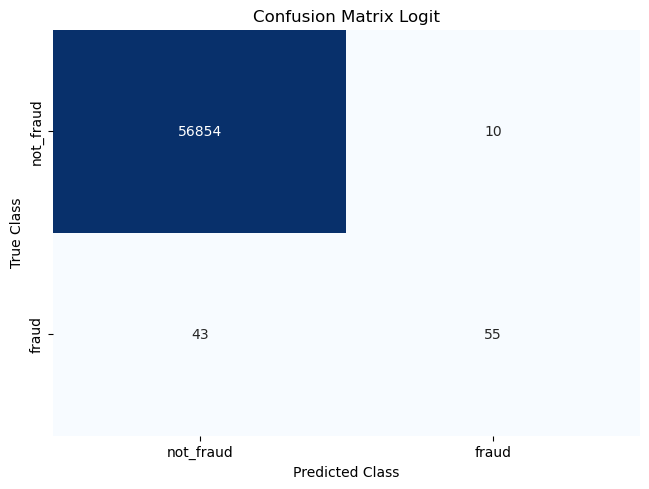

In [23]:
#print CM
matrix_logit = confusion_matrix(y_test, y_pred_logit)
cm_logit = pd.DataFrame(matrix_logit, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_logit, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Logit"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [24]:
#AUC
y_pred_logit_proba = model1.predict_proba(X_test)[::,1]
fpr_logit, tpr_logit, _ = metrics.roc_curve(y_test,  y_pred_logit_proba)
auc_logit = metrics.roc_auc_score(y_test, y_pred_logit_proba)
print("AUC Logistic Regression :", auc_logit)

AUC Logistic Regression : 0.4906267585818796


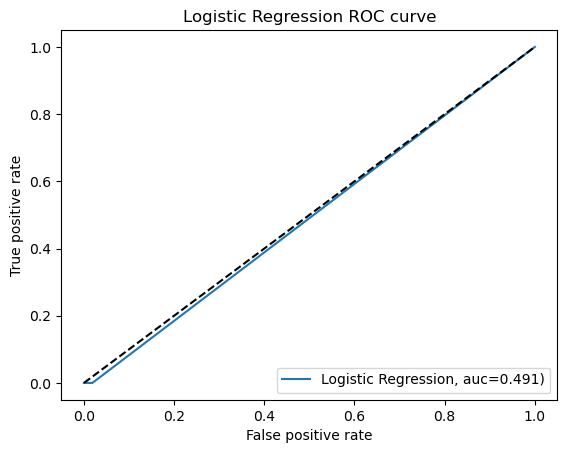

In [25]:
#ROC
plt.plot(fpr_logit,tpr_logit,label="Logistic Regression, auc={:.3f})".format(auc_logit))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression ROC curve')
plt.legend(loc=4)
plt.show()

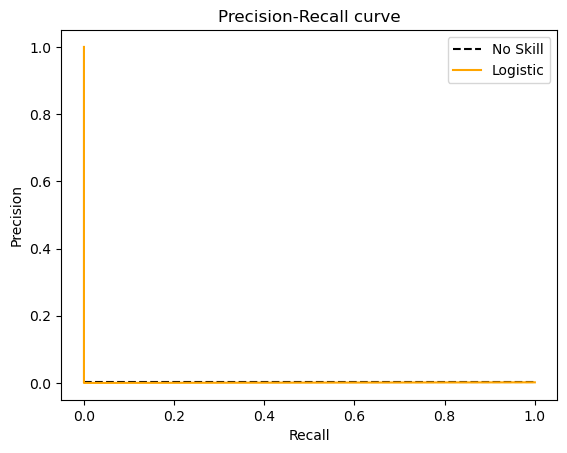

In [26]:
logit_precision, logit_recall, _ = precision_recall_curve(y_test, y_pred_logit_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(logit_recall, logit_precision, color='orange', label='Logistic')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [30]:
import joblib
joblib.dump(logit, 'logistic_regression_scaled_data_model.pkl')

print("Model trained on scaled data saved successfully as 'logistic_regression_scaled_data_model.pkl'")

Model trained on scaled data saved successfully as 'logistic_regression_scaled_data_model.pkl'


In [31]:
#train the model
model2 = SVC(probability=True, random_state=2)
svm = model2.fit(X_train, y_train)

In [32]:
#predictions
y_pred_svm = model2.predict(X_test)

In [33]:
#scores
print("Accuracy SVM:",metrics.accuracy_score(y_test, y_pred_svm))
print("Precision SVM:",metrics.precision_score(y_test, y_pred_svm))
print("Recall SVM:",metrics.recall_score(y_test, y_pred_svm))
print("F1 Score SVM:",metrics.f1_score(y_test, y_pred_svm))

Accuracy SVM: 0.9982795547909132
Precision SVM: 0.0
Recall SVM: 0.0
F1 Score SVM: 0.0


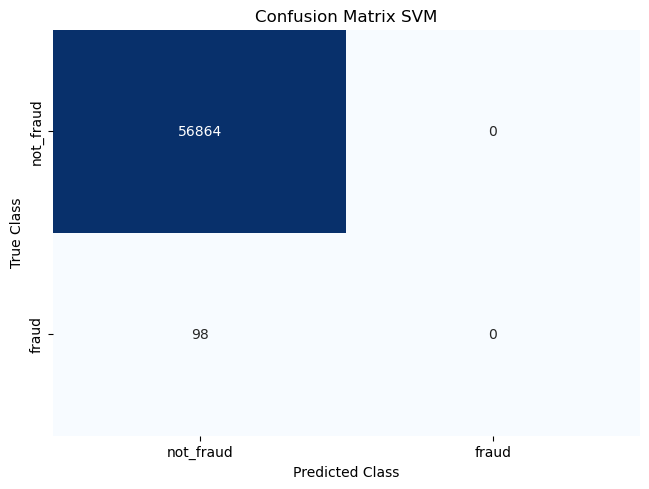

In [34]:
#CM matrix
matrix_svm = confusion_matrix(y_test, y_pred_svm)
cm_svm = pd.DataFrame(matrix_svm, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_svm, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix SVM"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [35]:
#AUC
y_pred_svm_proba = model2.predict_proba(X_test)[::,1]
fpr_svm, tpr_svm, _ = metrics.roc_curve(y_test,  y_pred_svm_proba)
auc_svm = metrics.roc_auc_score(y_test, y_pred_svm_proba)

In [36]:
print("AUC SVM :", auc_svm)

AUC SVM : 0.5210349720923823


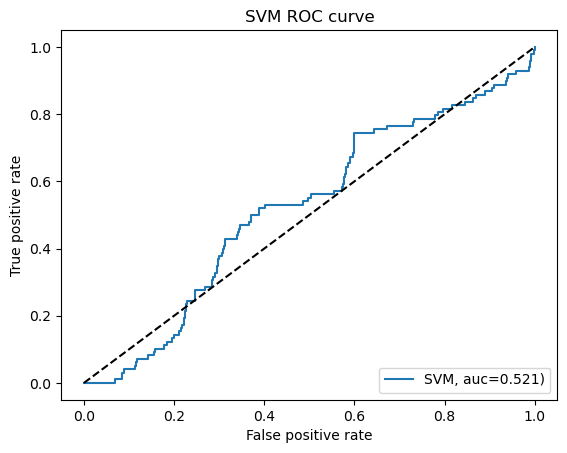

In [37]:
#ROC
plt.plot(fpr_svm,tpr_svm,label="SVM, auc={:.3f})".format(auc_svm))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('SVM ROC curve')
plt.legend(loc=4)
plt.show()

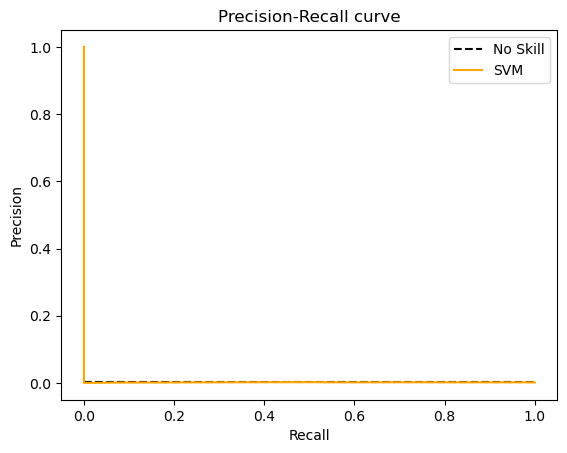

In [38]:
svm_precision, svm_recall, _ = precision_recall_curve(y_test, y_pred_svm_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(svm_recall, svm_precision, color='orange', label='SVM')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [39]:
import joblib
joblib.dump(svm, 'support_vector_machine.pkl')

['support_vector_machine.pkl']

In [40]:
#train the model
model3 = RandomForestClassifier(random_state=2)
rf = model3.fit(X_train, y_train)

In [41]:
#predictions
y_pred_rf = model3.predict(X_test)

In [42]:
#scores
print("Accuracy RF:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision RF:",metrics.precision_score(y_test, y_pred_rf))
print("Recall RF:",metrics.recall_score(y_test, y_pred_rf))
print("F1 Score RF:",metrics.f1_score(y_test, y_pred_rf))

Accuracy RF: 0.9995611109160493
Precision RF: 0.974025974025974
Recall RF: 0.7653061224489796
F1 Score RF: 0.8571428571428571


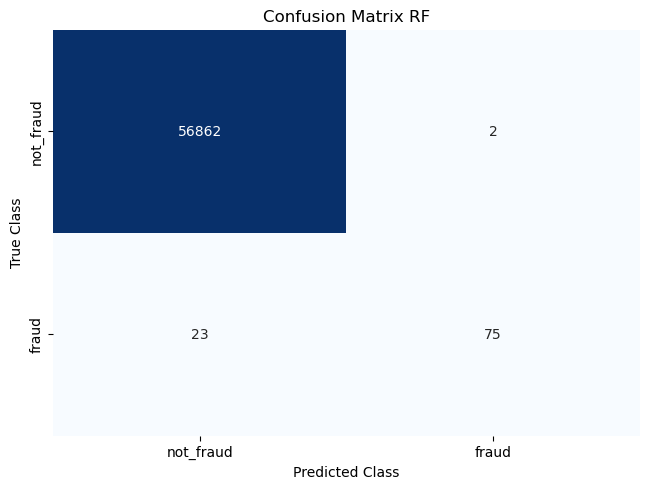

In [43]:
#CM matrix
matrix_rf = confusion_matrix(y_test, y_pred_rf)
cm_rf = pd.DataFrame(matrix_rf, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_rf, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix RF"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [44]:
#AUC
y_pred_rf_proba = model3.predict_proba(X_test)[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_rf_proba)
auc_rf = metrics.roc_auc_score(y_test, y_pred_rf_proba)
print("AUC Random Forest :", auc_rf)

AUC Random Forest : 0.9524914619055276


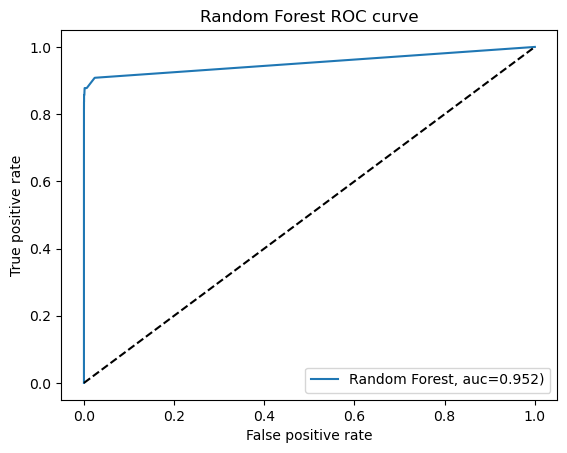

In [45]:
#ROC
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc={:.3f})".format(auc_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc=4)
plt.show()

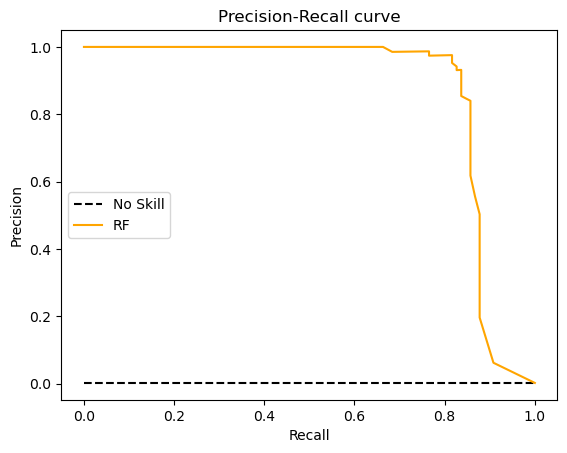

In [46]:
rf_precision, rf_recall, _ = precision_recall_curve(y_test, y_pred_rf_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(rf_recall, rf_precision, color='orange', label='RF')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [47]:
import joblib
joblib.dump(rf, 'random_forest_classifier.pkl')

['random_forest _classifier.pkl']

In [48]:
#train the model
model4 = XGBClassifier(random_state=2)
xgb = model4.fit(X_train, y_train)

In [49]:
#predictions
y_pred_xgb = model4.predict(X_test) 

In [50]:
#scores
print("Accuracy XGB:",metrics.accuracy_score(y_test, y_pred_xgb))
print("Precision XGB:",metrics.precision_score(y_test, y_pred_xgb))
print("Recall XGB:",metrics.recall_score(y_test, y_pred_xgb))
print("F1 Score XGB:",metrics.f1_score(y_test, y_pred_xgb))

Accuracy XGB: 0.9995786664794073
Precision XGB: 0.9404761904761905
Recall XGB: 0.8061224489795918
F1 Score XGB: 0.8681318681318682


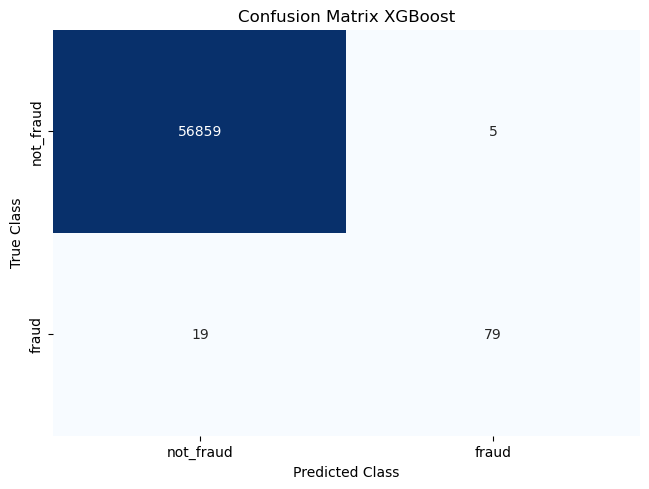

In [51]:
#CM matrix
matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
cm_xgb = pd.DataFrame(matrix_xgb, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_xgb, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix XGBoost"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [52]:
#AUC
y_pred_xgb_proba = model4.predict_proba(X_test)[::,1]
fpr_xgb, tpr_xgb, _ = metrics.roc_curve(y_test,  y_pred_xgb_proba)
auc_xgb = metrics.roc_auc_score(y_test, y_pred_xgb_proba)
print("AUC XGBoost :", auc_xgb)

AUC XGBoost : 0.940590259035522


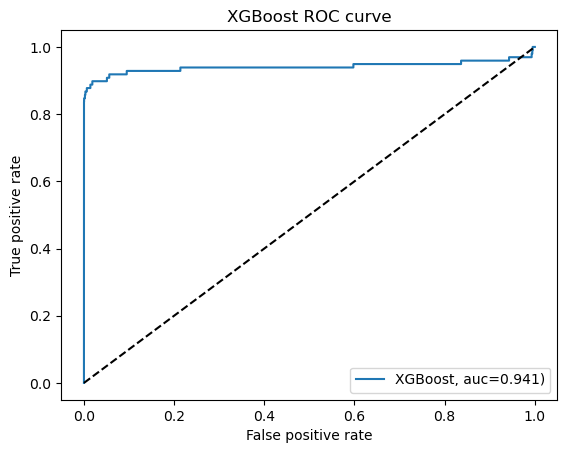

In [53]:
#ROC
plt.plot(fpr_xgb,tpr_xgb,label="XGBoost, auc={:.3f})".format(auc_xgb))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('XGBoost ROC curve')
plt.legend(loc=4)
plt.show()

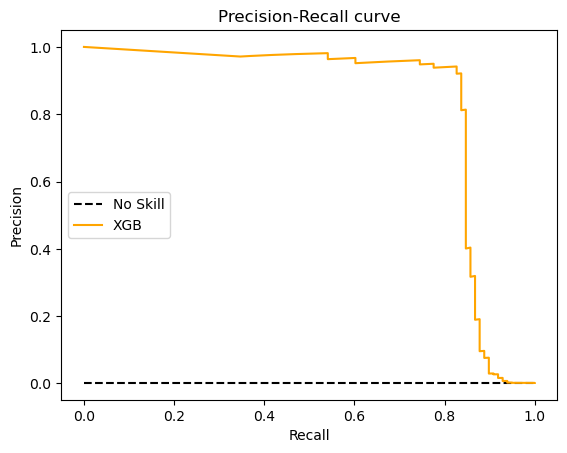

In [54]:
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, y_pred_xgb_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(xgb_recall, xgb_precision, color='orange', label='XGB')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [78]:
import joblib
joblib.dump(xgb, 'xgboost.pkl')

['xgboost.pkl']

In [56]:
#train the model
model5 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(100,100), random_state=2)
mlp = model5.fit(X_train, y_train)

In [57]:
model5.get_params(deep=True)

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 2,
 'shuffle': True,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [58]:
#predictions
y_pred_mlp = model5.predict(X_test)

In [59]:
#scores
print("Accuracy MLP:",metrics.accuracy_score(y_test, y_pred_mlp))
print("Precision MLP:",metrics.precision_score(y_test, y_pred_mlp))
print("Recall MLP:",metrics.recall_score(y_test, y_pred_mlp))
print("F1 Score MLP:",metrics.f1_score(y_test, y_pred_mlp))

Accuracy MLP: 0.9982795547909132
Precision MLP: 0.0
Recall MLP: 0.0
F1 Score MLP: 0.0


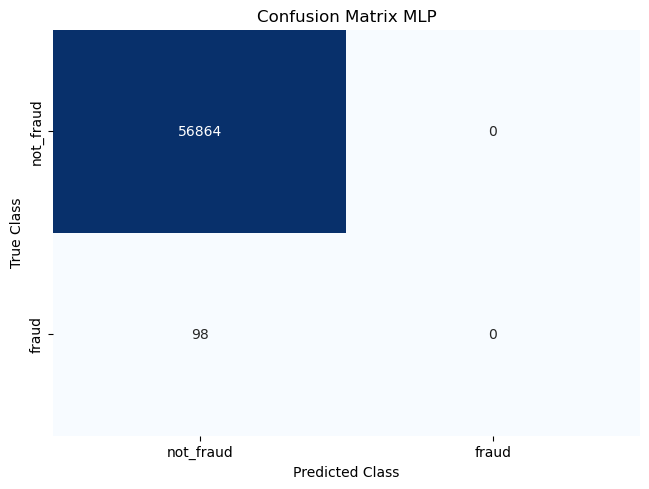

In [60]:
#CM matrix
matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
cm_mlp = pd.DataFrame(matrix_mlp, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_mlp, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix MLP"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [61]:
#AUC
y_pred_mlp_proba = model5.predict_proba(X_test)[::,1]
fpr_mlp, tpr_mlp, _ = metrics.roc_curve(y_test,  y_pred_mlp_proba)
auc_mlp = metrics.roc_auc_score(y_test, y_pred_mlp_proba)
print("AUC MLP :", auc_mlp)

AUC MLP : 0.48973867473269556


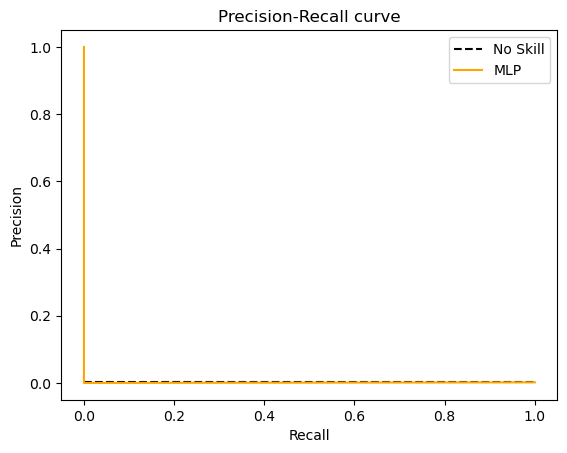

In [62]:
mlp_precision, mlp_recall, _ = precision_recall_curve(y_test, y_pred_mlp_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(mlp_recall, mlp_precision, color='orange', label='MLP')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [63]:
#train the model
model = Sequential()
model.add(Dense(32, input_shape=(29,), activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(16, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(8, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(4, activation='relu')),
model.add(Dropout(0.2)),
model.add(Dense(1, activation='sigmoid'))

2025-10-01 21:50:34.418402: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2025-10-01 21:50:34.418636: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-10-01 21:50:34.419510: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-10-01 21:50:34.420088: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-01 21:50:34.420502: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [64]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001) #optimizer

model.compile(optimizer=opt, loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy']) #metrics

In [65]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1,mode='auto', baseline=None, restore_best_weights=False)


In [66]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(29,)), 
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. Load Data ---
df = pd.read_csv('creditcard.csv')

# --- 2. Drop Unnecessary Columns FIRST ---
# Drop the target variable 'Class' and the 'Time' column
X = df.drop(['Class', 'Time'], axis=1) 
y = df['Class']

# At this point, X has 29 columns. You can verify with:
print(f"Shape of our feature data (X): {X.shape}") 

# --- 3. Split the FINALIZED Data ---
# Now we split the 29-column data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# --- 4. Scale the Split Data ---
# The scaler will now be fitted on the 29-column X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Now, X_train_scaled has 29 columns, matching our model
print(f"Shape of the scaled training data: {X_train_scaled.shape}")

Shape of our feature data (X): (284807, 29)
Shape of the scaled training data: (227845, 29)


Starting model training...
Epoch 1/20


2025-10-01 21:52:57.979412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


757/757 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.9397 - loss: 0.1908 - val_accuracy: 0.9987 - val_loss: 0.0139
Epoch 2/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9991 - loss: 0.0084 - val_accuracy: 0.9992 - val_loss: 0.0056
Epoch 3/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9992 - loss: 0.0050 - val_accuracy: 0.9986 - val_loss: 0.0080
Epoch 4/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9992 - loss: 0.0045 - val_accuracy: 0.9990 - val_loss: 0.0042
Epoch 5/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0048
Epoch 6/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9992 - val_loss: 0.0043
Epoch 7/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9992 - loss: 0.0044 - val_accuracy: 0.9991 - val_loss: 0.0047
Epoch 8/20
757/757 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9992 - loss: 0.0049 - val_accuracy: 0.9993 - va

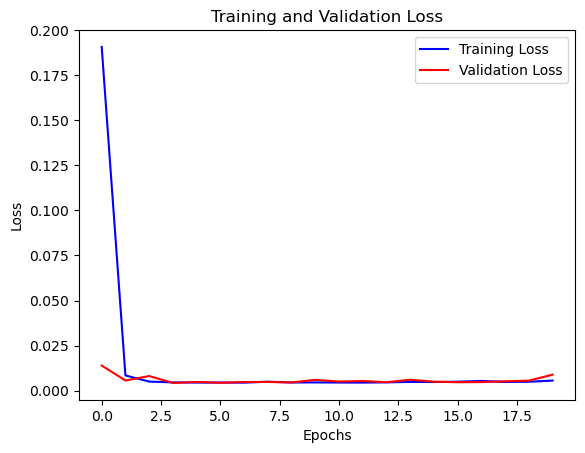

In [68]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# --- STEP 1: DEFINE THE MODEL ARCHITECTURE ---
# We are defining a new, clean model object.
# Make sure the input_shape matches your data (29 features).

model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(29,)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# --- STEP 2: COMPILE THE MODEL ---
# This configures the model for training.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# --- STEP 3: TRAIN THE MODEL ---
# Immediately call .fit() on the newly defined and compiled model.
# This ensures there is no stale state.
# Make sure X_train_scaled and y_train are correctly defined from your data prep cell.

print("Starting model training...")
history = model.fit(X_train_scaled, y_train, 
                    epochs=20, 
                    batch_size=256,
                    validation_split=0.15,
                    verbose=1)
print("Model training finished.")


# --- STEP 4: PLOT THE RESULTS ---
# This part is now guaranteed to work because 'history' was just created.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

plt.plot(loss_values, 'b', label='Training Loss')
plt.plot(val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

Text(0.5, 0, 'Epochs')

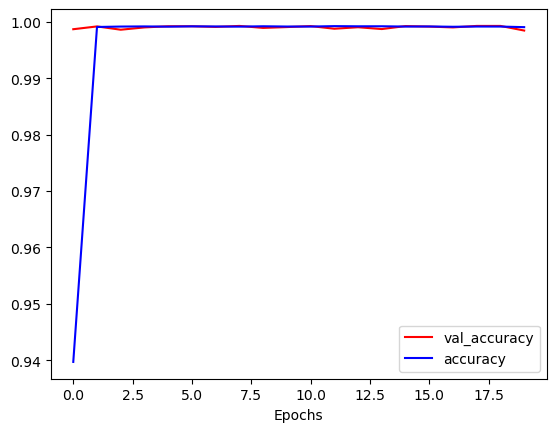

In [69]:
accuracy_values = history_dict['accuracy']
val_accuracy_values=history_dict['val_accuracy']
plt.plot(val_accuracy_values,'-r',label='val_accuracy')
plt.plot(accuracy_values,'-b',label='accuracy')
plt.legend()
plt.xlabel("Epochs")

In [70]:
# --- STEP 1: Get the raw prediction probabilities using the SCALED test data ---
# model.predict() will output a probability (a value between 0.0 and 1.0) for each sample.
y_pred_prob_nn = model.predict(X_test_scaled)

# --- STEP 2: Convert probabilities to class labels (0 or 1) ---
# We set a threshold of 0.5. If the probability is > 0.5, we classify it as 1 (fraud), otherwise 0 (not_fraud).
y_pred_nn = (y_pred_prob_nn > 0.5).astype(int)

# Now let's look at the results
# The first column is the raw probability, the second is the final class prediction.
import numpy as np
print("Probability vs. Class Prediction:")
print(np.hstack((y_pred_prob_nn[:5], y_pred_nn[:5]))) # Show the first 5 predictions```

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Probability vs. Class Prediction:
[[3.11802869e-05 0.00000000e+00]
 [4.80867275e-05 0.00000000e+00]
 [1.29458462e-08 0.00000000e+00]
 [6.25713612e-04 0.00000000e+00]
 [4.10434455e-02 0.00000000e+00]]


In [71]:
#scores
print("Accuracy Neural Net:",metrics.accuracy_score(y_test, y_pred_nn))
print("Precision Neural Net:",metrics.precision_score(y_test, y_pred_nn))
print("Recall Neural Net:",metrics.recall_score(y_test, y_pred_nn))
print("F1 Score Neural Net:",metrics.f1_score(y_test, y_pred_nn))

Accuracy Neural Net: 0.9984199992977775
Precision Neural Net: 0.5869565217391305
Recall Neural Net: 0.2755102040816326
F1 Score Neural Net: 0.375


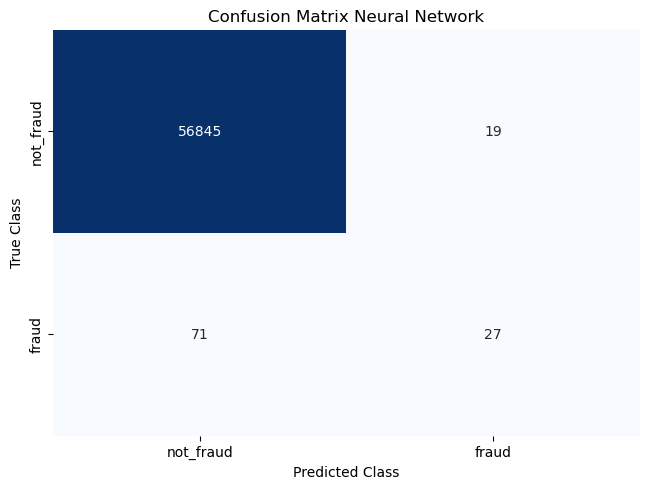

In [72]:
#CM matrix
matrix_nn = confusion_matrix(y_test, y_pred_nn)
cm_nn = pd.DataFrame(matrix_nn, index=['not_fraud', 'fraud'], columns=['not_fraud', 'fraud'])

sns.heatmap(cm_nn, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix Neural Network"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step
AUC for the Neural Network:  0.8088372148943989


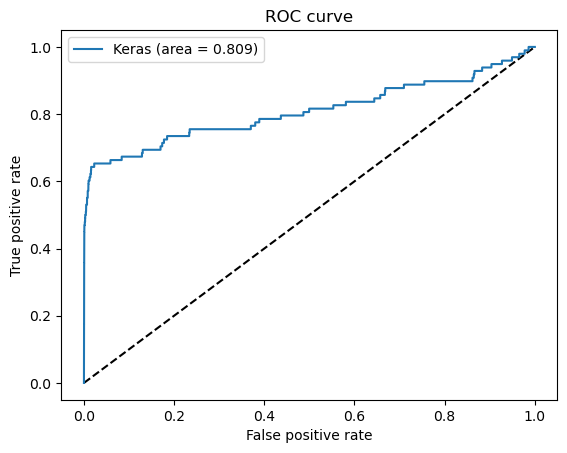

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# --- STEP 1: Get the prediction probabilities for the positive class ---
# Use .predict() on the SCALED test data. This is the correct way.
y_pred_nn_proba = model.predict(X_test_scaled)

# --- STEP 2: Calculate the ROC curve and AUC ---
# The roc_curve function needs the true labels and the predicted probabilities.
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_nn_proba)
auc_keras = auc(fpr_keras, tpr_keras)

print('AUC for the Neural Network: ', auc_keras)

# --- (Optional) STEP 3: Plot the ROC curve ---
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

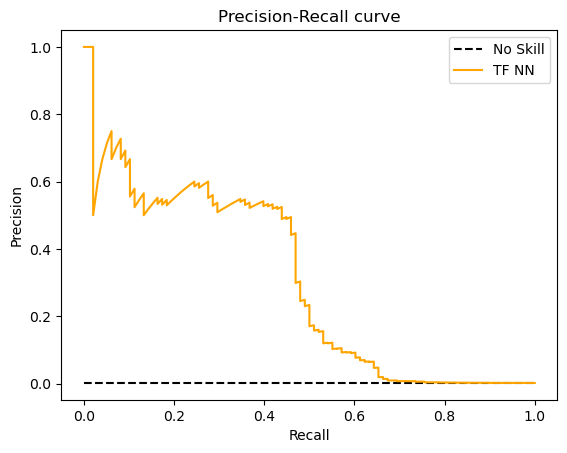

In [74]:
nn_precision, nn_recall, _ = precision_recall_curve(y_test, y_pred_nn_proba)
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', color='black', label='No Skill')
plt.plot(nn_recall, nn_precision, color='orange', label='TF NN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.legend()
plt.show()

In [77]:
model.save('neural_network.keras')

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# LOAD DATASET FIRST
df = pd.read_csv("creditcard.csv")

# Sort by Time (critical for sequence modeling)
df = df.sort_values("Time")

X = df.drop(['Class', 'Time'], axis=1).values
y = df['Class'].values

scaler = StandardScaler()
X = scaler.fit_transform(X)

SEQ_LEN = 10

X_seq = []
y_seq = []

for i in range(len(X) - SEQ_LEN):
    X_seq.append(X[i:i+SEQ_LEN])
    y_seq.append(y[i+SEQ_LEN])

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

print("Shape:", X_seq.shape)

Shape: (284797, 10, 29)


In [3]:
split = int(0.8 * len(X_seq))

X_train_seq = X_seq[:split]
X_test_seq = X_seq[split:]

y_train_seq = y_seq[:split]
y_test_seq = y_seq[split:]

In [4]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_seq),
    y=y_train_seq
)

class_weights = dict(enumerate(class_weights))
print(class_weights)

{0: 0.5009168059097705, 1: 273.18585131894486}


In [6]:
!pip install h5py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 7.5 MB/s eta 0:00:00ta 0:00:01


In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

SEQ_LEN = X_train_seq.shape[1]
N_FEATURES = X_train_seq.shape[2]

EMBED_DIM = 64
NUM_HEADS = 4
FF_DIM = 128
NUM_LAYERS = 3
DROPOUT = 0.2


# -------- Positional Encoding Layer --------
class PositionalEmbedding(layers.Layer):
    def __init__(self, seq_len, embed_dim):
        super().__init__()
        self.pos_emb = layers.Embedding(input_dim=seq_len, output_dim=embed_dim)
        self.seq_len = seq_len

    def call(self, x):
        positions = tf.range(start=0, limit=self.seq_len, delta=1)
        pos_encoding = self.pos_emb(positions)
        return x + pos_encoding


# -------- Transformer Encoder Block --------
def transformer_block(inputs):
    # Multi-head Self Attention
    attn_output = layers.MultiHeadAttention(
        num_heads=NUM_HEADS,
        key_dim=EMBED_DIM
    )(inputs, inputs)

    attn_output = layers.Dropout(DROPOUT)(attn_output)
    out1 = layers.LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    # Feed Forward Network
    ffn = layers.Dense(FF_DIM, activation="relu")(out1)
    ffn = layers.Dropout(DROPOUT)(ffn)
    ffn = layers.Dense(EMBED_DIM)(ffn)

    return layers.LayerNormalization(epsilon=1e-6)(out1 + ffn)


# -------- Model --------
inputs = keras.Input(shape=(SEQ_LEN, N_FEATURES))

# Project features into embedding dimension
x = layers.Dense(EMBED_DIM)(inputs)

# Add positional encoding
x = PositionalEmbedding(SEQ_LEN, EMBED_DIM)(x)

# Stack transformer layers
for _ in range(NUM_LAYERS):
    x = transformer_block(x)

# -------- Attention Pooling (FIXED VERSION) --------
attention_weights = layers.Dense(1, activation='tanh')(x)
attention_weights = layers.Softmax(axis=1)(attention_weights)

x = layers.Multiply()([x, attention_weights])
x = layers.GlobalAveragePooling1D()(x)

# -------- Classification Head --------
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(DROPOUT)(x)
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=[
        "accuracy",
        tf.keras.metrics.AUC(name="auc"),
        tf.keras.metrics.Precision(),
        tf.keras.metrics.Recall()
    ]
)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 10, 29)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 10, 64)    │      1,920 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ positional_embeddi… │ (None, 10, 64)    │        640 │ dense_8[0][0]     │
│ (PositionalEmbeddi… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 64)    │     66,368 │ positional_embed… │
│ (MultiHeadAttentio… │                   │            │ positional_embed… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 10, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_6 (Add)         │ (None, 10, 64)    │          0 │ positional_embed… │
│                     │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 64)    │        128 │ add_6[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 10, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 10, 128)   │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 10, 64)    │      8,256 │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_7 (Add)         │ (None, 10, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 64)    │        128 │ add_7[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 10, 64)    │     66,368 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 10, 64)    │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_8 (Add)         │ (None, 10, 64)    │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_13[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 10, 64)    │        128 │ add_8[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 10, 128)   │      8,320 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 10, 128)   │          0 │ dense_11[0][0]    │
│ (Dropout)           │                   │            │                 

 Total params: 268,866 (1.03 MB)

 Trainable params: 268,866 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
callbacks = [
    keras.callbacks.EarlyStopping(
        patience=5,
        restore_best_weights=True
    ),
    keras.callbacks.ReduceLROnPlateau(
        factor=0.5,
        patience=3
    )
]

history = model.fit(
    X_train_seq,
    y_train_seq,
    validation_data=(X_test_seq, y_test_seq),
    epochs=30,
    batch_size=256,
    class_weight=class_weights,
    callbacks=callbacks
)

Epoch 1/30


2026-02-21 18:03:13.107016: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


890/890 ━━━━━━━━━━━━━━━━━━━━ 109s 108ms/step - accuracy: 0.7834 - auc: 0.6360 - loss: 0.6583 - precision: 0.0038 - recall: 0.4436 - val_accuracy: 0.9925 - val_auc: 0.5151 - val_loss: 0.4112 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 2/30
890/890 ━━━━━━━━━━━━━━━━━━━━ 93s 104ms/step - accuracy: 0.7563 - auc: 0.6837 - loss: 0.6334 - precision: 0.0037 - recall: 0.4916 - val_accuracy: 0.9867 - val_auc: 0.5433 - val_loss: 0.3441 - val_precision: 0.0058 - val_recall: 0.0533 - learning_rate: 1.0000e-04
Epoch 3/30
890/890 ━━━━━━━━━━━━━━━━━━━━ 91s 102ms/step - accuracy: 0.6914 - auc: 0.6918 - loss: 0.6278 - precision: 0.0034 - recall: 0.5779 - val_accuracy: 0.9762 - val_auc: 0.5064 - val_loss: 0.3667 - val_precision: 0.0039 - val_recall: 0.0667 - learning_rate: 1.0000e-04
Epoch 4/30
890/890 ━━━━━━━━━━━━━━━━━━━━ 92s 103ms/step - accuracy: 0.7622 - auc: 0.6773 - loss: 0.6380 - precision: 0.0036 - recall: 0.4724 - val_accuracy: 0.8241 - val_auc: 0.4686 - 

In [10]:
results = model.evaluate(X_test_seq, y_test_seq)
print("Test Results:", results)

1780/1780 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9867 - auc: 0.5433 - loss: 0.3441 - precision: 0.0058 - recall: 0.0533
Test Results: [0.34408050775527954, 0.9866573214530945, 0.543268084526062, 0.005772005766630173, 0.0533333346247673]


1780/1780 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step


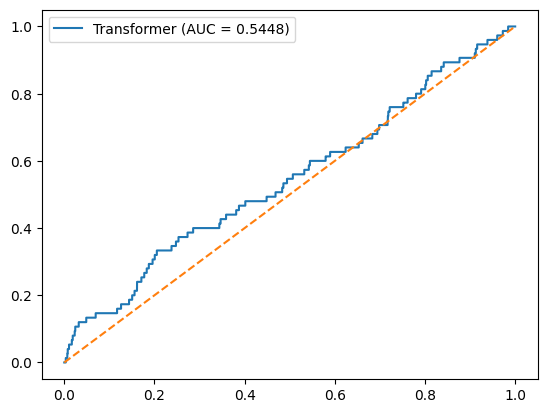

In [11]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_seq)

fpr, tpr, _ = roc_curve(y_test_seq, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label="Transformer (AUC = %0.4f)" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.legend()
plt.show()

In [12]:
from sklearn import metrics
import numpy as np

y_pred_prob = model.predict(X_test_seq)

y_pred = (y_pred_prob > 0.5).astype(int)

print("Accuracy Transformer:", metrics.accuracy_score(y_test_seq, y_pred))
print("Precision Transformer:", metrics.precision_score(y_test_seq, y_pred))
print("Recall Transformer:", metrics.recall_score(y_test_seq, y_pred))
print("F1 Score Transformer:", metrics.f1_score(y_test_seq, y_pred))
print("AUC Transformer:", metrics.roc_auc_score(y_test_seq, y_pred_prob))

1780/1780 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step
Accuracy Transformer: 0.9866573033707865
Precision Transformer: 0.005772005772005772
Recall Transformer: 0.05333333333333334
F1 Score Transformer: 0.010416666666666666
AUC Transformer: 0.5448165011280068


1780/1780 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step


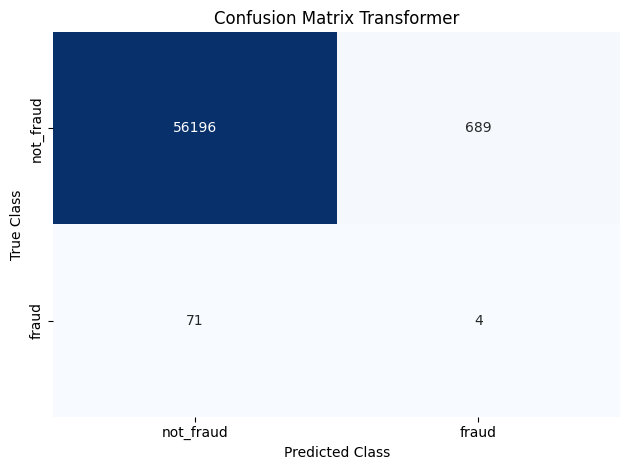

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

y_pred_prob = model.predict(X_test_seq)

y_pred = (y_pred_prob > 0.5).astype(int)

matrix_tf = confusion_matrix(y_test_seq, y_pred)

cm_tf = pd.DataFrame(
    matrix_tf,
    index=['not_fraud', 'fraud'],
    columns=['not_fraud', 'fraud']
)

sns.heatmap(cm_tf, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix Transformer")
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.tight_layout()
plt.show()

1780/1780 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step
AUC for Transformer: 0.5448165011280068


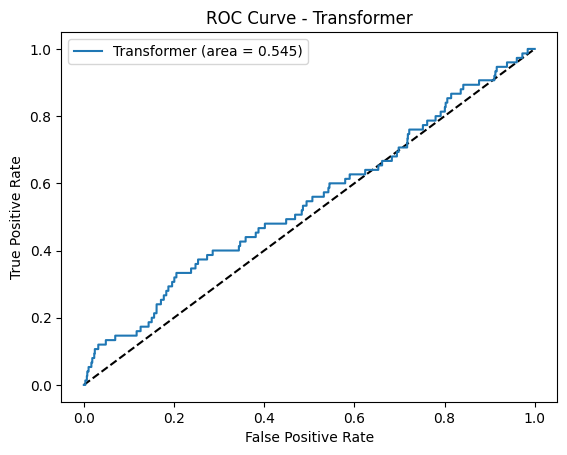

In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_pred_prob = model.predict(X_test_seq)

fpr, tpr, thresholds = roc_curve(y_test_seq, y_pred_prob)

roc_auc = auc(fpr, tpr)

print("AUC for Transformer:", roc_auc)

plt.figure()
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Transformer (area = {:.3f})'.format(roc_auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Transformer')
plt.legend(loc='best')
plt.show()

In [1]:
!pip install lightgbm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 3.7 MB/s eta 0:00:00ta 0:00:01


In [2]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("creditcard.csv")

X = df.drop("Class", axis=1)
y = df["Class"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [6]:
scale_pos_weight = len(y_train[y_train==0]) / len(y_train[y_train==1])

In [7]:
lgb_model = lgb.LGBMClassifier(
    n_estimators=800,
    learning_rate=0.03,
    num_leaves=64,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    reg_alpha=0.1,
    reg_lambda=0.1,
    random_state=42
)

In [8]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 394, number of negative: 227451
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008331 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 227845, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001729 -> initscore=-6.358339
[LightGBM] [Info] Start training from score -6.358339
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

,boosting_type,'gbdt'
,num_leaves,64
,max_depth,-1
,learning_rate,0.03
,n_estimators,800
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [9]:
y_pred = lgb_model.predict(X_test)
y_prob = lgb_model.predict_proba(X_test)[:,1]

/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [11]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nROC-AUC Score:")
print

Confusion Matrix:
[[56833    31]
 [   16    82]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.84      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962


ROC-AUC Score:


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [14]:
y_pred_lgb = lgb_model.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [15]:
from sklearn import metrics

print("Accuracy LightGBM:", metrics.accuracy_score(y_test, y_pred_lgb))
print("Precision LightGBM:", metrics.precision_score(y_test, y_pred_lgb))
print("Recall LightGBM:", metrics.recall_score(y_test, y_pred_lgb))
print("F1 Score LightGBM:", metrics.f1_score(y_test, y_pred_lgb))

Accuracy LightGBM: 0.9991748885221726
Precision LightGBM: 0.7256637168141593
Recall LightGBM: 0.8367346938775511
F1 Score LightGBM: 0.7772511848341233


In [17]:
y_pred_lgb = lgb_model.predict(X_test)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


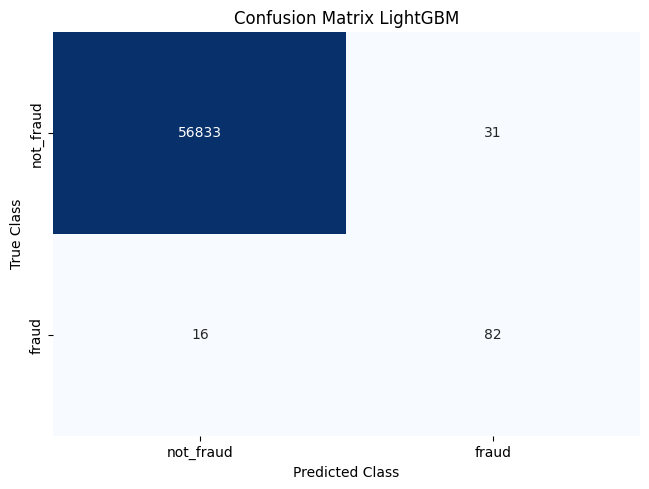

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

matrix_lgb = confusion_matrix(y_test, y_pred_lgb)

cm_lgb = pd.DataFrame(
    matrix_lgb,
    index=['not_fraud', 'fraud'],
    columns=['not_fraud', 'fraud']
)

sns.heatmap(cm_lgb, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix LightGBM")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


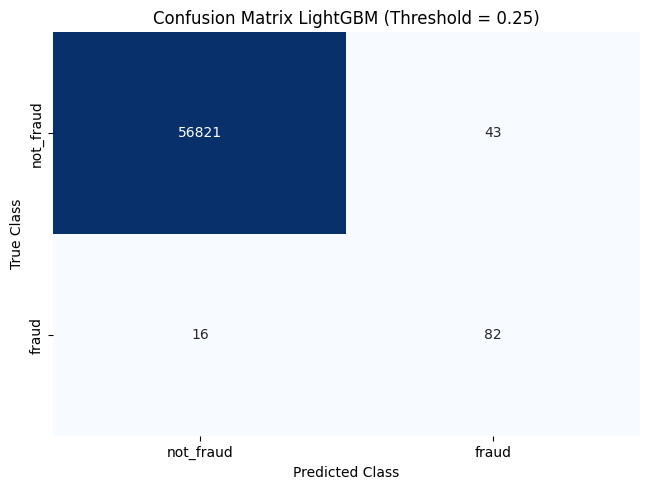

In [19]:
y_prob_lgb = lgb_model.predict_proba(X_test)[:,1]
threshold = 0.25
y_pred_lgb_adj = (y_prob_lgb > threshold).astype(int)

matrix_lgb_adj = confusion_matrix(y_test, y_pred_lgb_adj)

cm_lgb_adj = pd.DataFrame(
    matrix_lgb_adj,
    index=['not_fraud', 'fraud'],
    columns=['not_fraud', 'fraud']
)

sns.heatmap(cm_lgb_adj, annot=True, cbar=None, cmap="Blues", fmt='g')
plt.title("Confusion Matrix LightGBM (Threshold = 0.25)")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability for positive class (fraud = 1)
y_pred_lgb_proba = lgb_model.predict_proba(X_test)[:, 1]

/opt/homebrew/Caskroom/miniforge/base/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [21]:
fpr_lgb, tpr_lgb, thresholds_lgb = roc_curve(y_test, y_pred_lgb_proba)
auc_lgb = auc(fpr_lgb, tpr_lgb)

print('AUC for LightGBM: ', auc_lgb)

AUC for LightGBM:  0.9197645222973827


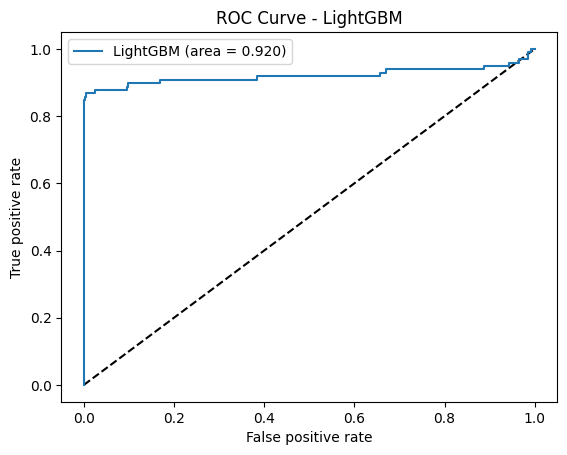

In [22]:
plt.figure(1)

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--')

# LightGBM ROC
plt.plot(fpr_lgb, tpr_lgb, label='LightGBM (area = {:.3f})'.format(auc_lgb))

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve - LightGBM')
plt.legend(loc='best')
plt.show()